In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
cityfile = 'raw_data/city_data.csv'
ridefile = 'raw_data/ride_data.csv'

city_df = pd.read_csv(cityfile)
ride_df = pd.read_csv(ridefile)
df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [49]:
df = pd.merge(city_df, ride_df, how='outer', on='city')
df.head()
urban = df.loc[(df['type']=='Urban')]
suburban = df.loc[(df['type']=='Suburban')]
rural = df.loc[(df['type']=='Rural')]

In [102]:
UAverageFare=urban.groupby(['city'])['fare'].mean()
URideCount = urban.groupby(['city'])['fare'].count()
UDriverCount = urban.groupby(['city'])['driver_count'].mean()

SAverageFare=suburban.groupby(['city'])['fare'].mean()
SRideCount = suburban.groupby(['city'])['fare'].count()
SDriverCount = suburban.groupby(['city'])['driver_count'].mean()

RAverageFare=rural.groupby(['city'])['fare'].mean()
RRideCount = rural.groupby(['city'])['fare'].count()
RDriverCount = rural.groupby(['city'])['driver_count'].mean()



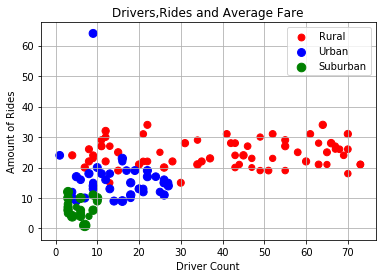

In [99]:
Rural = plt.scatter(UDriverCount,URideCount,s=UAverageFare**1.2,c='r')
Urban = plt.scatter(SDriverCount,SRideCount,s=SAverageFare**1.2,c='b')
Suburban = plt.scatter(RDriverCount,RRideCount,s=RAverageFare**1.2,c='g')



plt.title("Drivers,Rides and Average Fare")
plt.xlabel("Driver Count")
plt.ylabel("Amount of Rides")
plt.xmin=0

plt.legend([Rural, Urban, Suburban], ('Rural', 'Urban', 'Suburban'),loc ='best')
plt.grid()
plt.show()

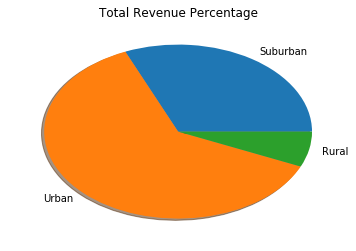

In [119]:

labels = ['Suburban','Urban','Rural']

TotalFare = [suburban['fare'].sum(),urban['fare'].sum(),rural['fare'].sum()]
plt.pie(TotalFare,labels=labels,shadow='True')
plt.title("Total Revenue Percentage")
plt.show()

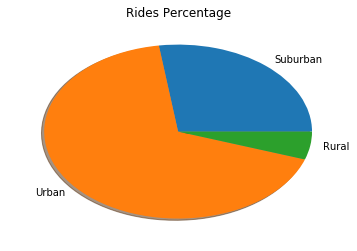

In [120]:
TotalFare = [suburban['fare'].count(),urban['fare'].count(),rural['fare'].count()]
plt.pie(TotalFare,labels=labels,shadow='True')
plt.title("Rides Percentage")
plt.show()

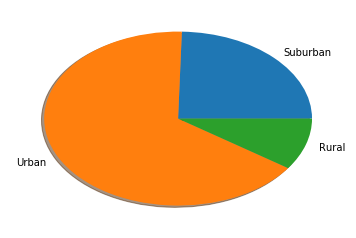

In [118]:
TotalFare = [suburban['driver_count'].mean(),urban['driver_count'].mean(),rural['driver_count'].mean()]
plt.pie(TotalFare,labels=labels,shadow='True')
plt.title("Employee L Percentage")
plt.show()